# This notebook provides interactive widgets to play with the imaging requirements for the SKA1 SDP

## First, do the necessary set-up (run the code block below, first)

In [6]:
""" These first few lines below import the IPython definitions and methods that we will use. 
Please Refer to ipython_api.py for the implementation """
"# NB Recent versions of IPython require that \"ipywidgets\" be installed separately for the import line below to work.\n",
from IPython.html.widgets import interact, interactive, fixed
from IPython.html.widgets.interaction import interact_manual
from IPython.html import widgets
#from ipywidgets import interact, interact_manual, fixed
#import ipywidgets as widgets
from api_ipython import SkaIPythonAPI as iapi
from parameter_definitions import *
from parameter_definitions import Constants as c
from implementation import Implementation as imp

%matplotlib inline

# The lines below define the available telescopes, bands and modes that may be chosen.

available_teles = (Telescopes.SKA1_Low, Telescopes.SKA1_Low_old, Telescopes.SKA1_Mid, Telescopes.SKA1_Mid_old, 
                   Telescopes.SKA1_Sur_old, Telescopes.SKA2_Low, Telescopes.SKA2_Mid)
available_bands = (Bands.Low, 
                   Bands.Mid1, Bands.Mid2, Bands.Mid5A, Bands.Mid5B, 
                   Bands.Sur1)
available_modes     = (ImagingModes.Continuum, ImagingModes.Spectral, ImagingModes.FastImg)
available_modes_all = (ImagingModes.Continuum, ImagingModes.Spectral, ImagingModes.FastImg, ImagingModes.All)
verbose_display = False

## Using default values, we can compare telescopes side-by-side

Max baseline = 80000
Max baseline = 75000


Telescope,SKA1_Low_rebaselined,SKA1_Mid_rebaselined,
Band,Low,Mid1,
Mode,Fast Imaging,Fast Imaging,
Baseline Dependent Time Avg.,True,True,
Max Baseline,80000,150000,m
Max # channels,65536,65536,
Optimal Number of Facets,1,1,
Optimal Snapshot Time,1.0,1.0,sec.
Image side length,13246,28880,pixels
Visibility Buffer,0.000402,0.000235,PetaBytes
Working (cache) memory,0.466,0.395,TeraBytes


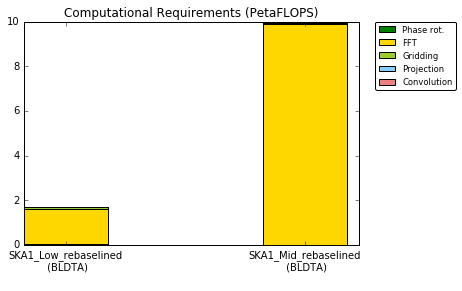

In [7]:
interact_manual(iapi.compare_telescopes_default, 
                telescope_1=available_teles, telescope_2=available_teles, band_1=available_bands,
                band_2=available_bands, mode_1=available_modes_all, mode_2=available_modes_all,
                verbose=verbose_display);

## We can also interactively play with parameters (via sliders)

### The first option is automatic updating of results as the sliders are moved. This may be sluggish

In [ ]:
interact(iapi.evaluate_telescope_manual, max_baseline=(10000,200000), Nf_max = (1,256000,1), Nfacet=(1,10,1), Tsnap=(1.2,1800), 
         telescope=available_teles, band=available_bands, mode=available_modes_all, verbose=verbose_display);

### The second option is manual triggering of recompute events (recommended). 

#### This allows more conveniently computing elaborate (slow) optimizations and visualizations per computation, as these are only run when required
#### In this example, *Tsnap and Nfacet* are *automatically* chosen so as to minimize the value of Rflop

In [ ]:
interact_manual(iapi.evaluate_telescope_optimized, max_baseline=(10000,200000), Nf_max = (1,256000,1), telescope=available_teles, 
         band=available_bands, mode=available_modes_all, verbose=verbose_display);

## illustrating 1D "parameter sweep" + visualization functionality.

Starting sweep of parameter Bmax, evaluating expression Rflop over range (15000, 150000) in 9 steps (i.e. 10 data points)
> 0.0% done: Evaluating Rflop for Bmax = 15000
> 10.0% done: Evaluating Rflop for Bmax = 30000
> 20.0% done: Evaluating Rflop for Bmax = 45000
> 30.0% done: Evaluating Rflop for Bmax = 60000
> 40.0% done: Evaluating Rflop for Bmax = 75000
> 50.0% done: Evaluating Rflop for Bmax = 90000
> 60.0% done: Evaluating Rflop for Bmax = 105000
> 70.0% done: Evaluating Rflop for Bmax = 120000
> 80.0% done: Evaluating Rflop for Bmax = 135000
> 90.0% done: Evaluating Rflop for Bmax = 150000
done with parameter sweep!


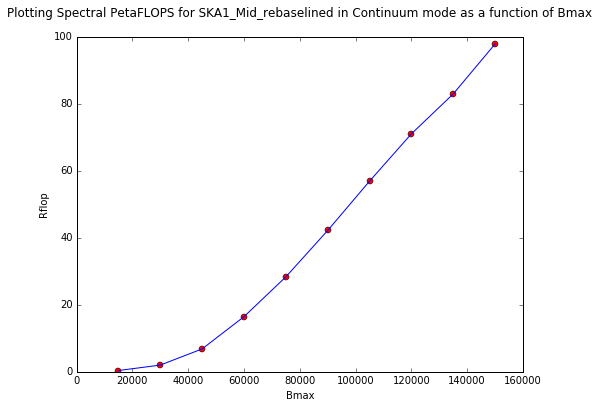

15000.0 , 0.378266863662
30000.0 , 2.00828777549
45000.0 , 6.83059644571
60000.0 , 16.4581915845
75000.0 , 28.3467794981
90000.0 , 42.204655006
105000.0 , 56.9302187635
120000.0 , 71.0631365929
135000.0 , 82.9938848371
150000.0 , 97.9126160131


In [11]:
from IPython.display import display, HTML

expression = 'Rflop'
parameter = 'Bmax'
param_val_min =15000
param_val_max = 150000
number_steps = 9
telescope = Telescopes.SKA1_Mid
immode = ImagingModes.Continuum
band=Bands.Mid1

display(HTML('<font color="blue">Computing the result -- this may take several (tens of) seconds.</font>'))
(param_values, results) = iapi.eval_param_sweep_1d(telescope, immode, band=band, 
                                                   expression=expression, parameter=parameter, param_val_min=param_val_min,
                                                   param_val_max=param_val_max, number_steps=number_steps, verbose=False)
header = 'Plotting Spectral PetaFLOPS for %s in %s mode as a function of %s' % (telescope, immode, parameter)
iapi.plot_line_datapoints(header, param_values, np.array(results)/c.peta, xlabel=parameter, ylabel=expression)

for i in range(len(param_values)):
               print param_values[i], ",", (results[i])/c.peta

## illustrating 2D "parameter sweep" + visualization functionality.

Evaluating expression Rflop while
sweeping parameters Nf_out and minimum_channels over 2D domain [100, 500] x [100, 500] in 4 steps each,
for a total of 25 data evaluation points
> 0.0% done: Evaluating Rflop for (Nf_out, minimum_channels) = (100.0, 100.0)
> 4.0% done: Evaluating Rflop for (Nf_out, minimum_channels) = (100.0, 200.0)
> 8.0% done: Evaluating Rflop for (Nf_out, minimum_channels) = (100.0, 300.0)
> 12.0% done: Evaluating Rflop for (Nf_out, minimum_channels) = (100.0, 400.0)
> 16.0% done: Evaluating Rflop for (Nf_out, minimum_channels) = (100.0, 500.0)
> 20.0% done: Evaluating Rflop for (Nf_out, minimum_channels) = (200.0, 100.0)
> 24.0% done: Evaluating Rflop for (Nf_out, minimum_channels) = (200.0, 200.0)
> 28.0% done: Evaluating Rflop for (Nf_out, minimum_channels) = (200.0, 300.0)
> 32.0% done: Evaluating Rflop for (Nf_out, minimum_channels) = (200.0, 400.0)
> 36.0% done: Evaluating Rflop for (Nf_out, minimum_channels) = (200.0, 500.0)
> 40.0% done: Evaluating Rflop for

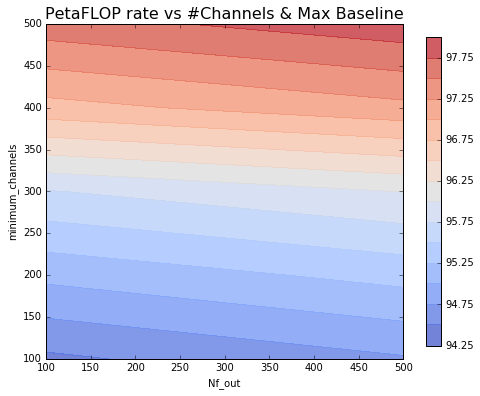

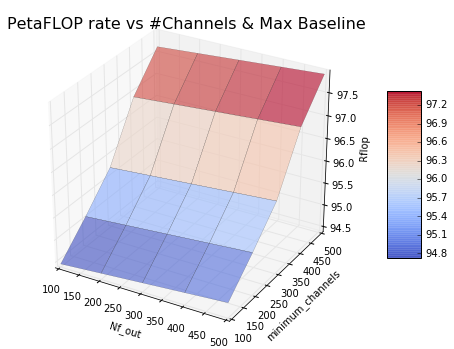

In [12]:
from IPython.display import display, HTML

telescope = Telescopes.SKA1_Mid
band = Bands.Mid1
immode = ImagingModes.Continuum
expression = 'Rflop'
parameters = ('Nf_out', 'minimum_channels')
parameter_ranges = ((100,500),(100,500))
number_steps = 4
verbose = False

display(HTML('<font color="blue">Computing the result -- this may take several (tens of) seconds.</font>'))
(p1_values, p2_values, results) = iapi.eval_param_sweep_2d(telescope, immode, band=band, 
                                                           expression=expression, parameters=parameters, 
                                                           params_ranges=parameter_ranges, number_steps=number_steps, 
                                                           verbose=verbose)


iapi.plot_2D_surface('PetaFLOP rate vs #Channels & Max Baseline', p1_values, p2_values, results/1e15, xlabel=parameters[0], 
                     ylabel=parameters[1], contours=np.array((0.5, 1.0)))
iapi.plot_3D_surface('PetaFLOP rate vs #Channels & Max Baseline', p1_values, p2_values, results/1e15, xlabel=parameters[0], 
                     ylabel=parameters[1], zlabel=expression, contours=np.array((0.5, 1.0)))

In [13]:
print results/1e15

[[ 94.45146314  94.51982281  94.58815517  94.65646004  94.72473749]
 [ 95.06571634  95.13383057  95.20191781  95.269978    95.33801124]
 [ 95.73536454  95.80323031  95.87106933  95.93888177  96.00666752]
 [ 96.90945276  96.97768093  97.04588237  97.1140575   97.18220581]
 [ 97.64089439  97.70886413  97.77680771  97.844725    97.91261601]]
